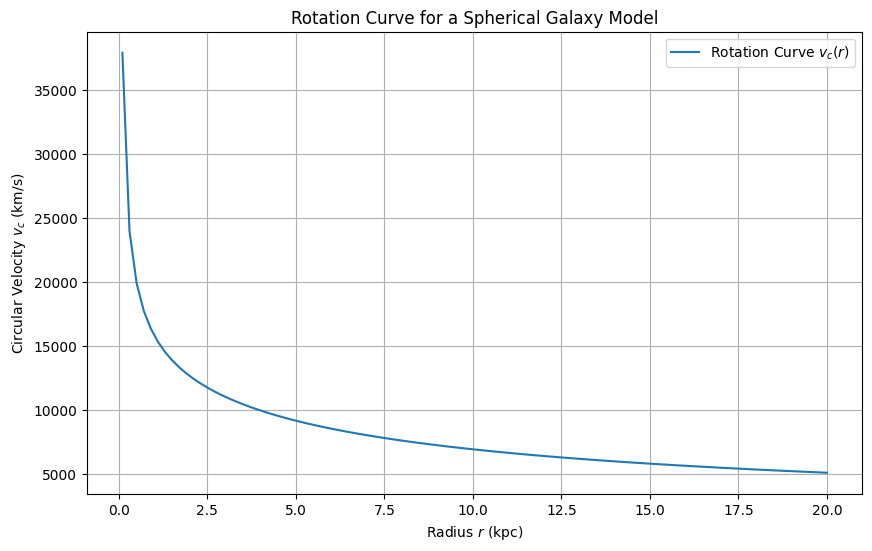

(37927.25388014083, 0.1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
G = 4.302e-3  
a = 3.0  
M_inf = 2.0e11 

def vc_squared(r, a, M_inf):
    term1 = 1 - a / (r + a)
    term2 = 0.5 - a / (2 * (r + a)**2)
    enclosed_mass_fraction = (2/3) * (term1 + term2)
    return (2 * G * M_inf / (3 * r)) * enclosed_mass_fraction

r_values = np.linspace(0.1, 20, 100) 
vc_values = np.sqrt(vc_squared(r_values, a, M_inf))

plt.figure(figsize=(10, 6))
plt.plot(r_values, vc_values, label='Rotation Curve $v_c(r)$')
plt.xlabel('Radius $r$ (kpc)')
plt.ylabel('Circular Velocity $v_c$ (km/s)')
plt.title('Rotation Curve for a Spherical Galaxy Model')
plt.legend()
plt.grid()
plt.show()

vc_max = np.max(vc_values)
r_max = r_values[np.argmax(vc_values)]

vc_max, r_max


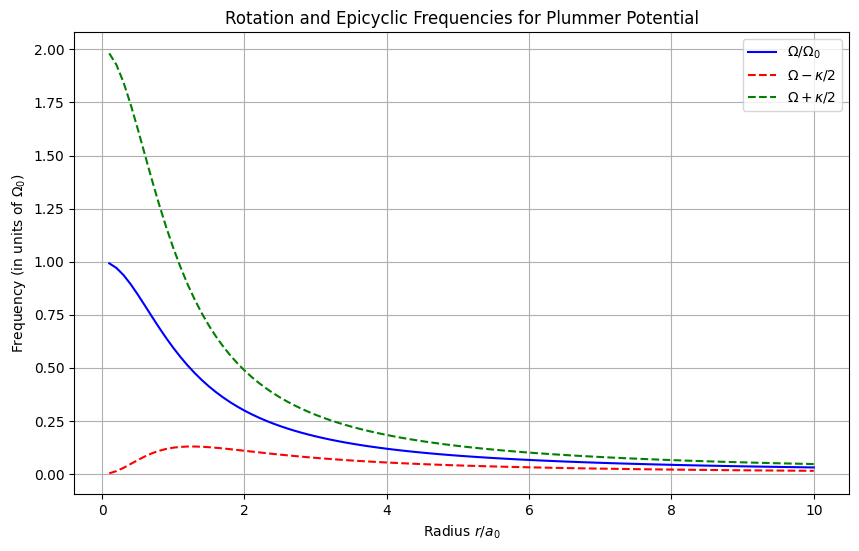

In [2]:

def Omega(r, a0):
    return 1 / (1 + (r / a0)**2)**(3/4)

def kappa(r, a0):
    return np.sqrt((4 + (r / a0)**2) / (1 + (r / a0)**2)**(5/2))

r_a0_values = np.linspace(0.1, 10, 100)

Omega_values = Omega(r_a0_values, 1)
kappa_values = kappa(r_a0_values, 1)
Omega_minus_kappa_2 = Omega_values - 0.5 * kappa_values
Omega_plus_kappa_2 = Omega_values + 0.5 * kappa_values

plt.figure(figsize=(10, 6))
plt.plot(r_a0_values, Omega_values, label='$\Omega / \Omega_0$', color='b')
plt.plot(r_a0_values, Omega_minus_kappa_2, label='$\Omega - \kappa/2$', linestyle='--', color='r')
plt.plot(r_a0_values, Omega_plus_kappa_2, label='$\Omega + \kappa/2$', linestyle='--', color='g')
plt.xlabel('Radius $r/a_0$')
plt.ylabel('Frequency (in units of $\Omega_0$)')
plt.title('Rotation and Epicyclic Frequencies for Plummer Potential')
plt.legend()
plt.grid()
plt.show()


In [3]:
from scipy.optimize import fsolve

# Define the equation for finding the OLR location: Omega + kappa/2 = Omega_p
Omega_p = 0.1  # Omega_p/Omega_0

def OLR_equation(r_over_a0):
    return Omega(r_over_a0, 1) + 0.5 * kappa(r_over_a0, 1) - Omega_p

# Use fsolve to find the root of the OLR equation
r_OLR_over_a0 = fsolve(OLR_equation, 5)  # Initial guess of 5

r_OLR_over_a0[0]


6.05287281057041

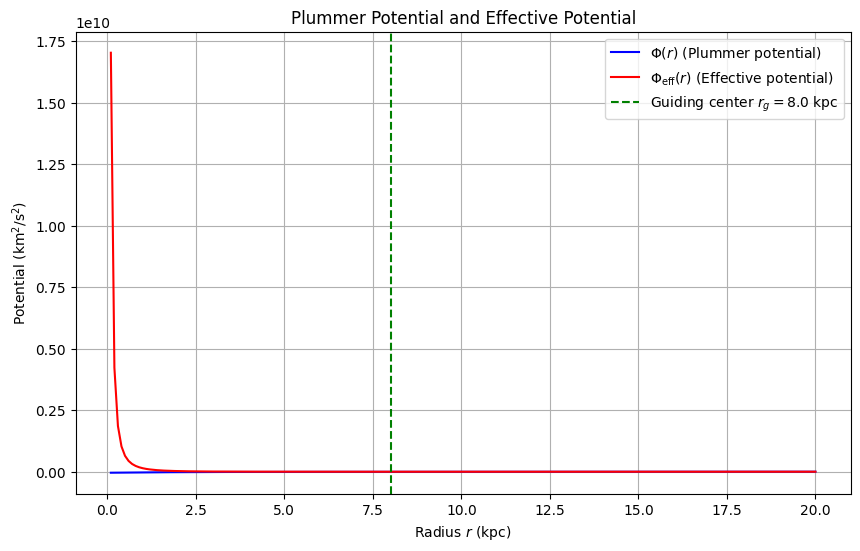

8.1

In [4]:
r_g = 8.0  
a0 = 1.0  
M = 1e10  
L = r_g * np.sqrt(G * M / np.sqrt(r_g**2 + a0**2)) 
def Phi(r, a0, M):
    return -G * M / np.sqrt(r**2 + a0**2)

def Phi_eff(r, L, a0, M):
    return Phi(r, a0, M) + L**2 / (2 * r**2)

r_values_plot = np.linspace(0.1, 20, 200)

Phi_values = Phi(r_values_plot, a0, M)
Phi_eff_values = Phi_eff(r_values_plot, L, a0, M)

plt.figure(figsize=(10, 6))
plt.plot(r_values_plot, Phi_values, label='$\Phi(r)$ (Plummer potential)', color='b')
plt.plot(r_values_plot, Phi_eff_values, label='$\Phi_{\mathrm{eff}}(r)$ (Effective potential)', color='r')
plt.axvline(x=r_g, linestyle='--', color='g', label=f'Guiding center $r_g = {r_g}$ kpc')
plt.xlabel('Radius $r$ (kpc)')
plt.ylabel('Potential (km$^2$/s$^2$)')
plt.title('Plummer Potential and Effective Potential')
plt.legend()
plt.grid()
plt.show()

r_min_eff = r_values_plot[np.argmin(Phi_eff_values)]

r_min_eff
